In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

#imported the necessary library for now

In [2]:
#let read our files

df=pd.read_csv(r'C:\Users\HP\Downloads\archive (9)\HR_comma_sep.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<AxesSubplot:ylabel='None'>

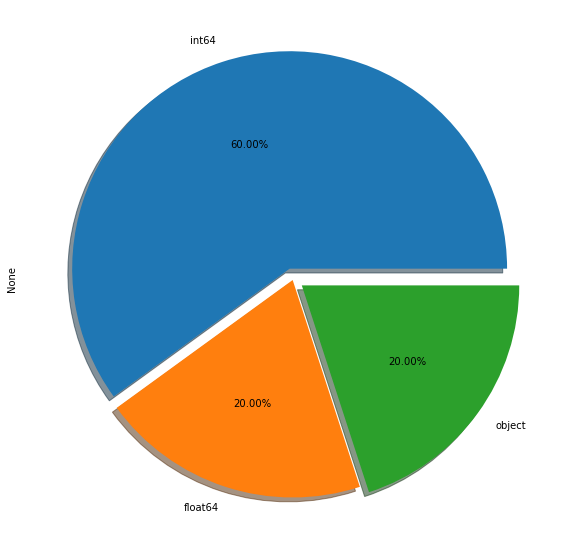

In [3]:
#we have about 14999 row and 10 columns
#Has can seen, no missing values

#let plot for the data type i our columns

df.dtypes.value_counts().plot.pie(figsize=(15,10),shadow=True,autopct='%1.2f%%',explode=(0.05,0.005,0.05))

In [4]:
print('we have about 60% of int columns data,20% float & 20% object columns in our table.')

we have about 60% of int columns data,20% float & 20% object columns in our table.


In [5]:
#let view our table

df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


let talk about the column name in our able

Satisfaction_level-fullfilment of work

last evaluation-job level of judgement 

Number of Project - the numbers of project the staff accomplish

Average_MOnthly_hours- maximum hours or time spent at work

Time_spent_in_company- time spent in the comapny

work_accident- work accident spent at work

left-Staff or employee leave or stay

promotionLast5years- if promotion is granted in the last five(5) years 1 represent YES 0 represent NO

Department- Staff/Employee department they work

Salary- Wages or salary for the employee according to their department or rank

"it should be note that-
    
    from 0 - 0.30 is Poor Rating
    
    from 0.30 - 0.59 is fair Rating
    
    from 0.60 - 0.69 is Good Rating
    
    from 0.70 - 0.85 is Very Good Rating
    
    While from 0.86 - 0.99 is Exllect Work "



#We Done with Preprocessing 


#moving Straight to EDA

In [6]:
dframe=df.copy()

In [7]:
#let find the level of their satisfaction at work?

#but before dving deep to it,
#let sharpaly do a subtitutional method.


def subtitution(x):
    if x == 1:
        return 'Left'
    else:
        return 'Retain'

In [8]:
dframe['Level_Satisfaction']=dframe['satisfaction_level'].apply(subtitution)

In [9]:
dframe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,Level_Satisfaction
0,0.38,0.53,2,157,3,0,1,0,sales,low,Retain
1,0.80,0.86,5,262,6,0,1,0,sales,medium,Retain
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Retain
3,0.72,0.87,5,223,5,0,1,0,sales,low,Retain
4,0.37,0.52,2,159,3,0,1,0,sales,low,Retain
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,Retain
14995,0.37,0.48,2,160,3,0,1,0,support,low,Retain
14996,0.37,0.53,2,143,3,0,1,0,support,low,Retain
14997,0.11,0.96,6,280,4,0,1,0,support,low,Retain


In [10]:
dframe.rename(columns={'Level_Satisfaction':'Staff_Status'},inplace=True)

In [11]:
dframe=dframe.drop('Staff_Status',axis=1)

In [12]:
dframe['Employee_Status']=dframe['satisfaction_level'].apply(subtitution)

In [13]:
dframe.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,Employee_Status
0,0.38,0.53,2,157,3,0,1,0,sales,low,Retain
1,0.80,0.86,5,262,6,0,1,0,sales,medium,Retain
2,0.11,0.88,7,272,4,0,1,0,sales,medium,Retain
3,0.72,0.87,5,223,5,0,1,0,sales,low,Retain
4,0.37,0.52,2,159,3,0,1,0,sales,low,Retain


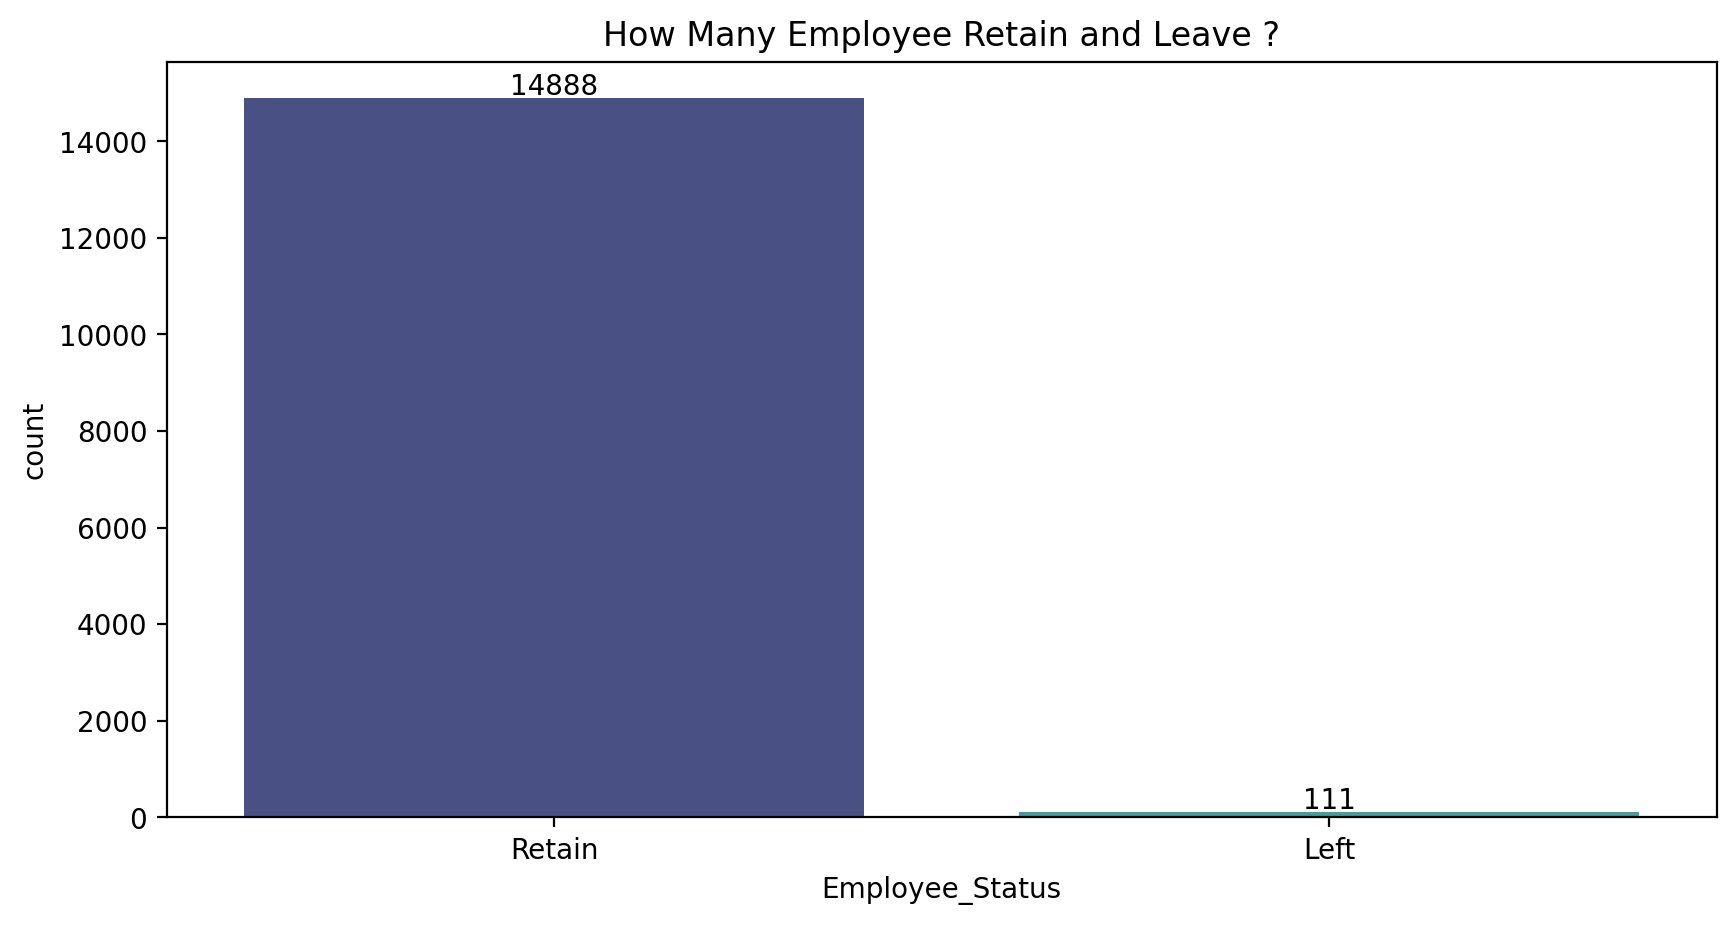

In [14]:
#how may employee retain and how many employee leave???

plt.figure(figsize=(10,5),dpi=200)
fig=sns.countplot(data=dframe,x='Employee_Status',palette='mako')
plt.title('How Many Employee Retain and Leave ?')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

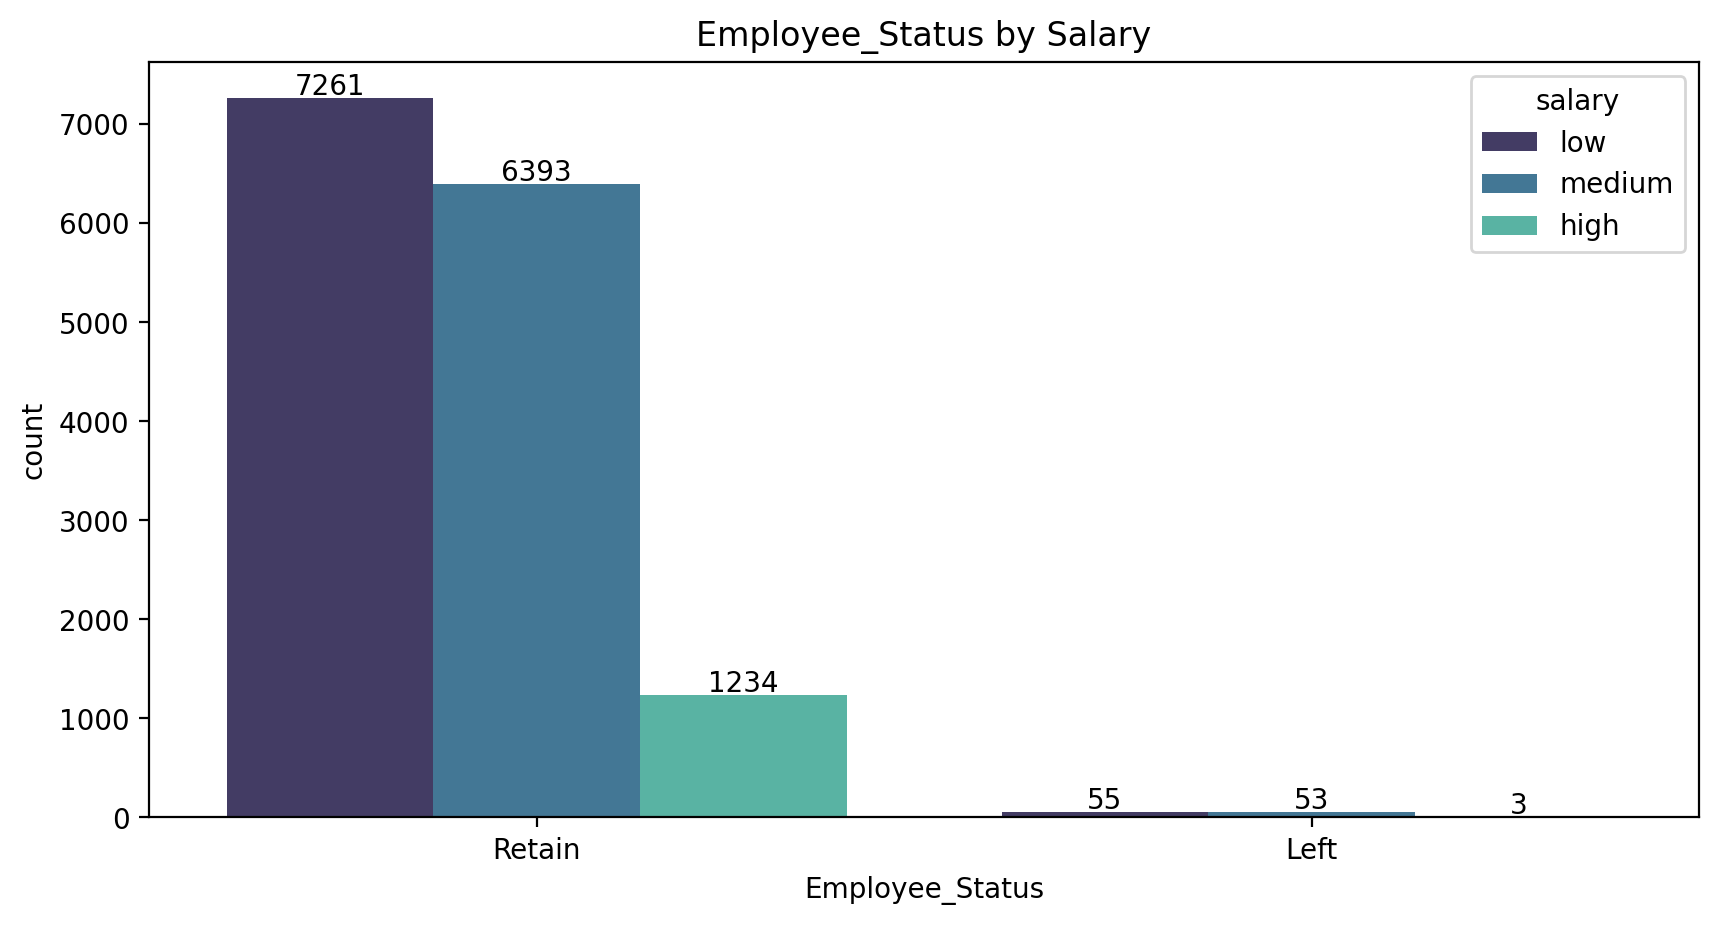

In [15]:
plt.figure(figsize=(10,5),dpi=200)
fig=sns.countplot(data=dframe,x='Employee_Status',hue='salary',palette='mako')
plt.title('Employee_Status by Salary')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

In [16]:
#it should be note that Emplyee_status is also know as left Columns.

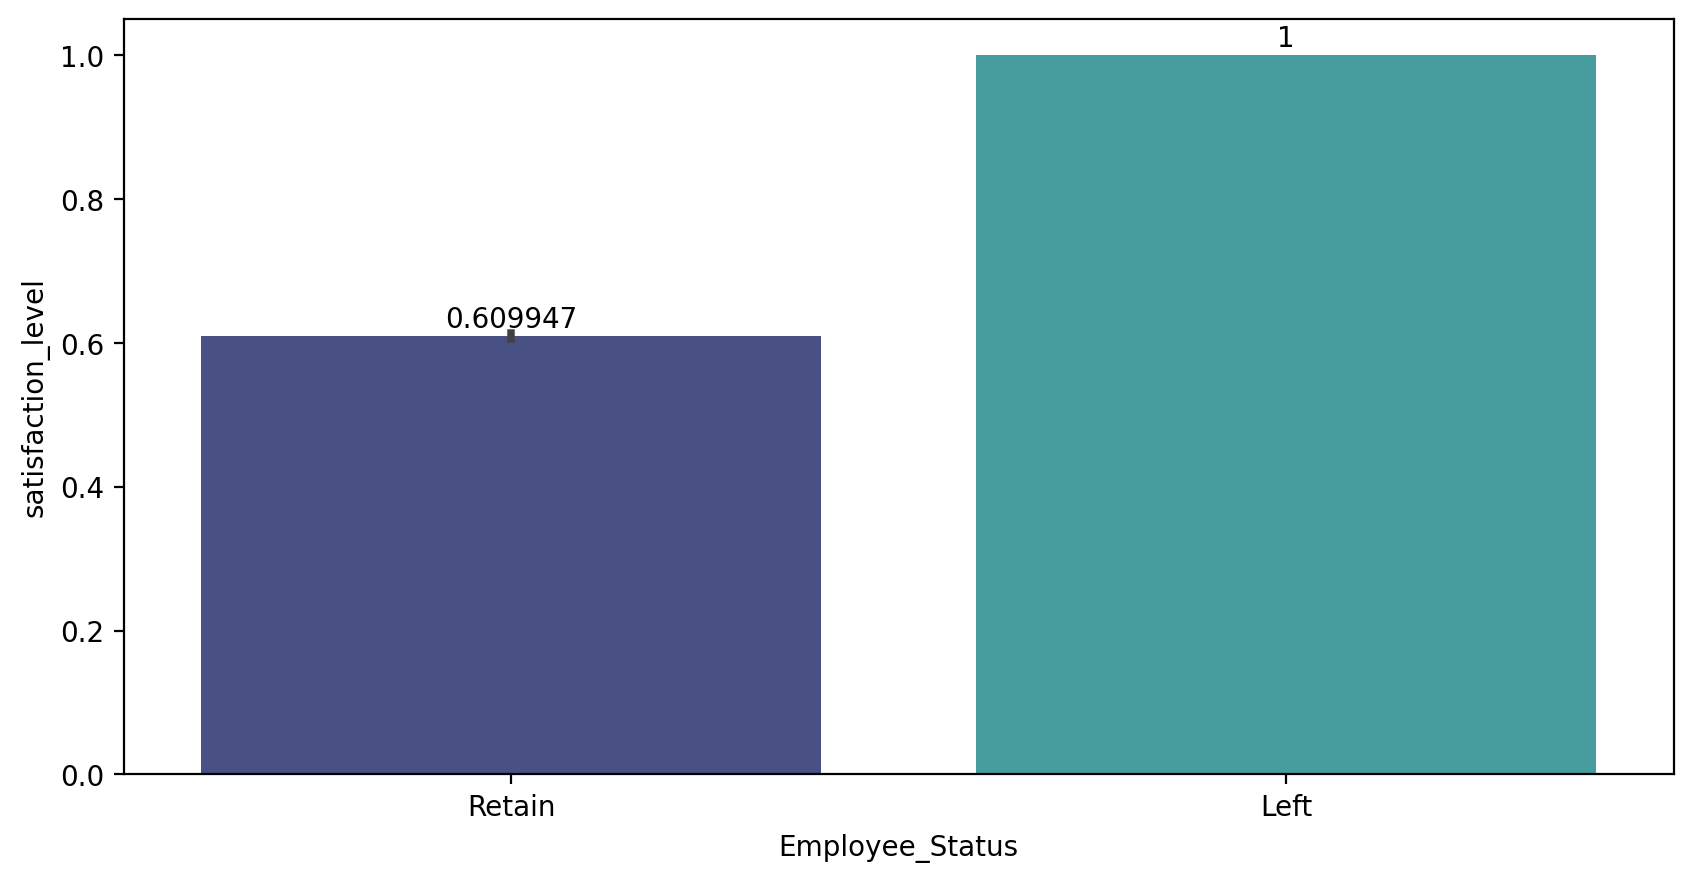

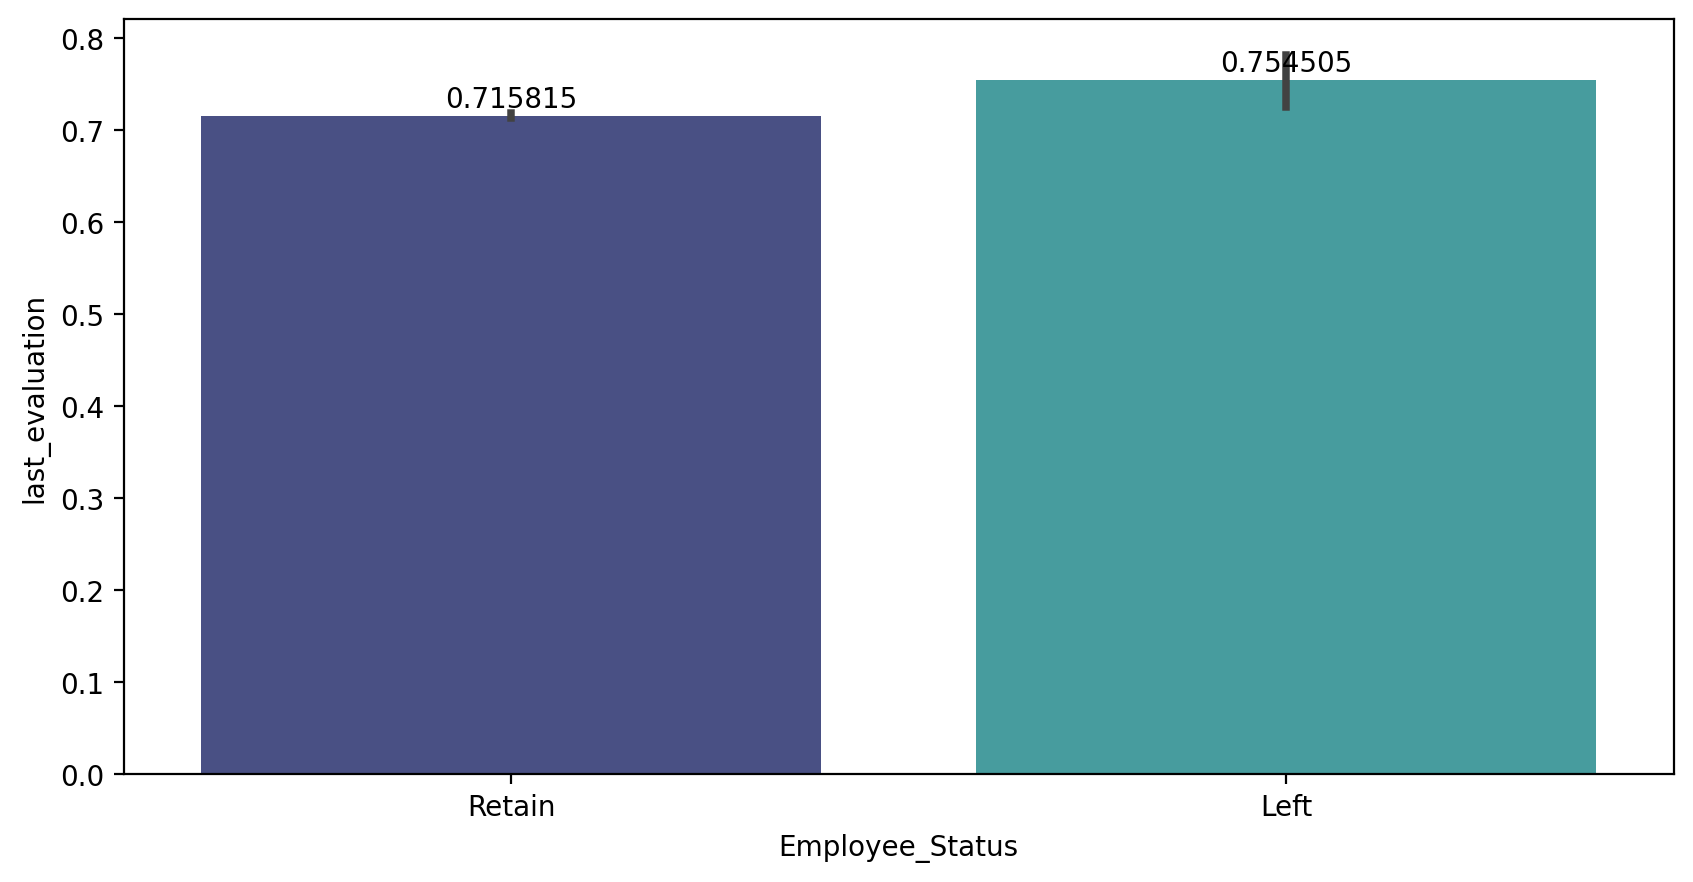

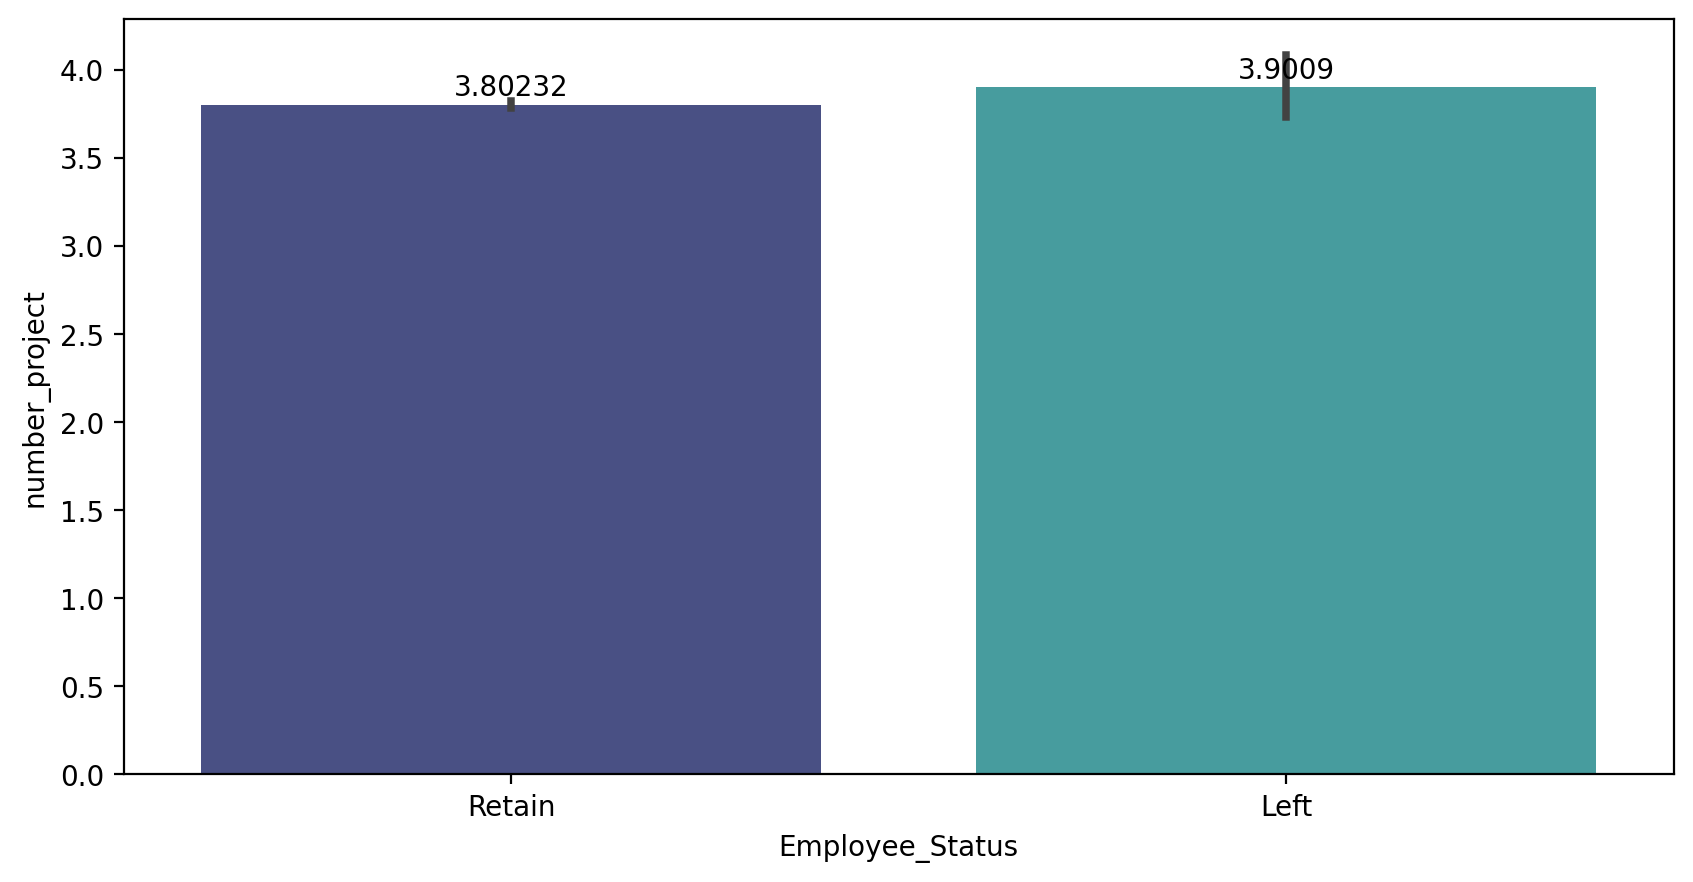

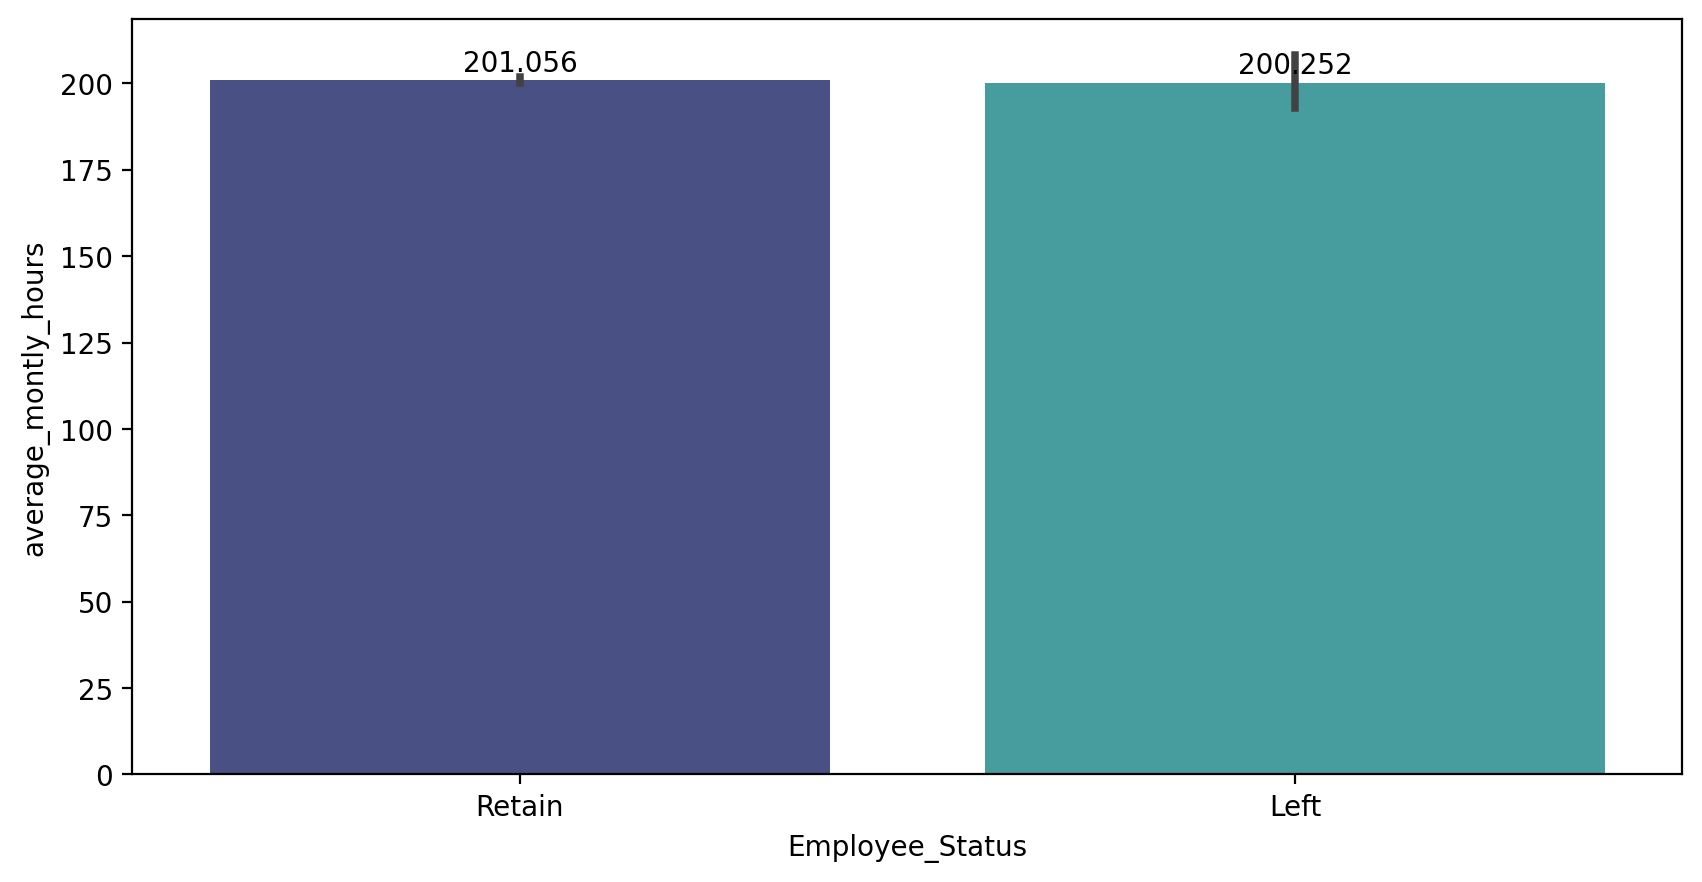

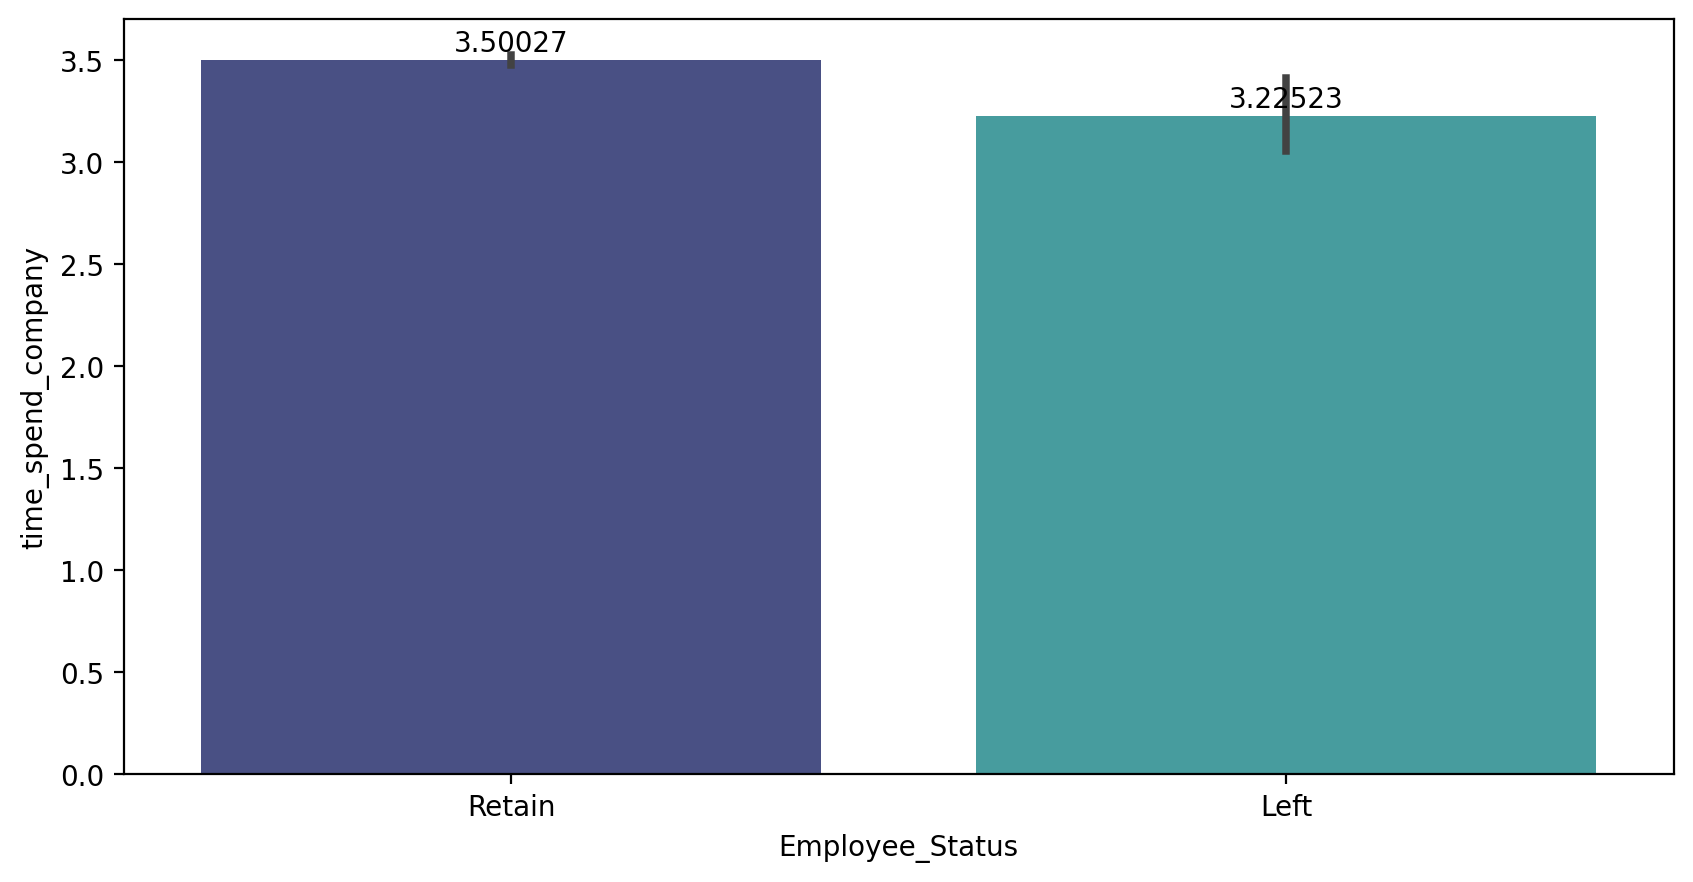

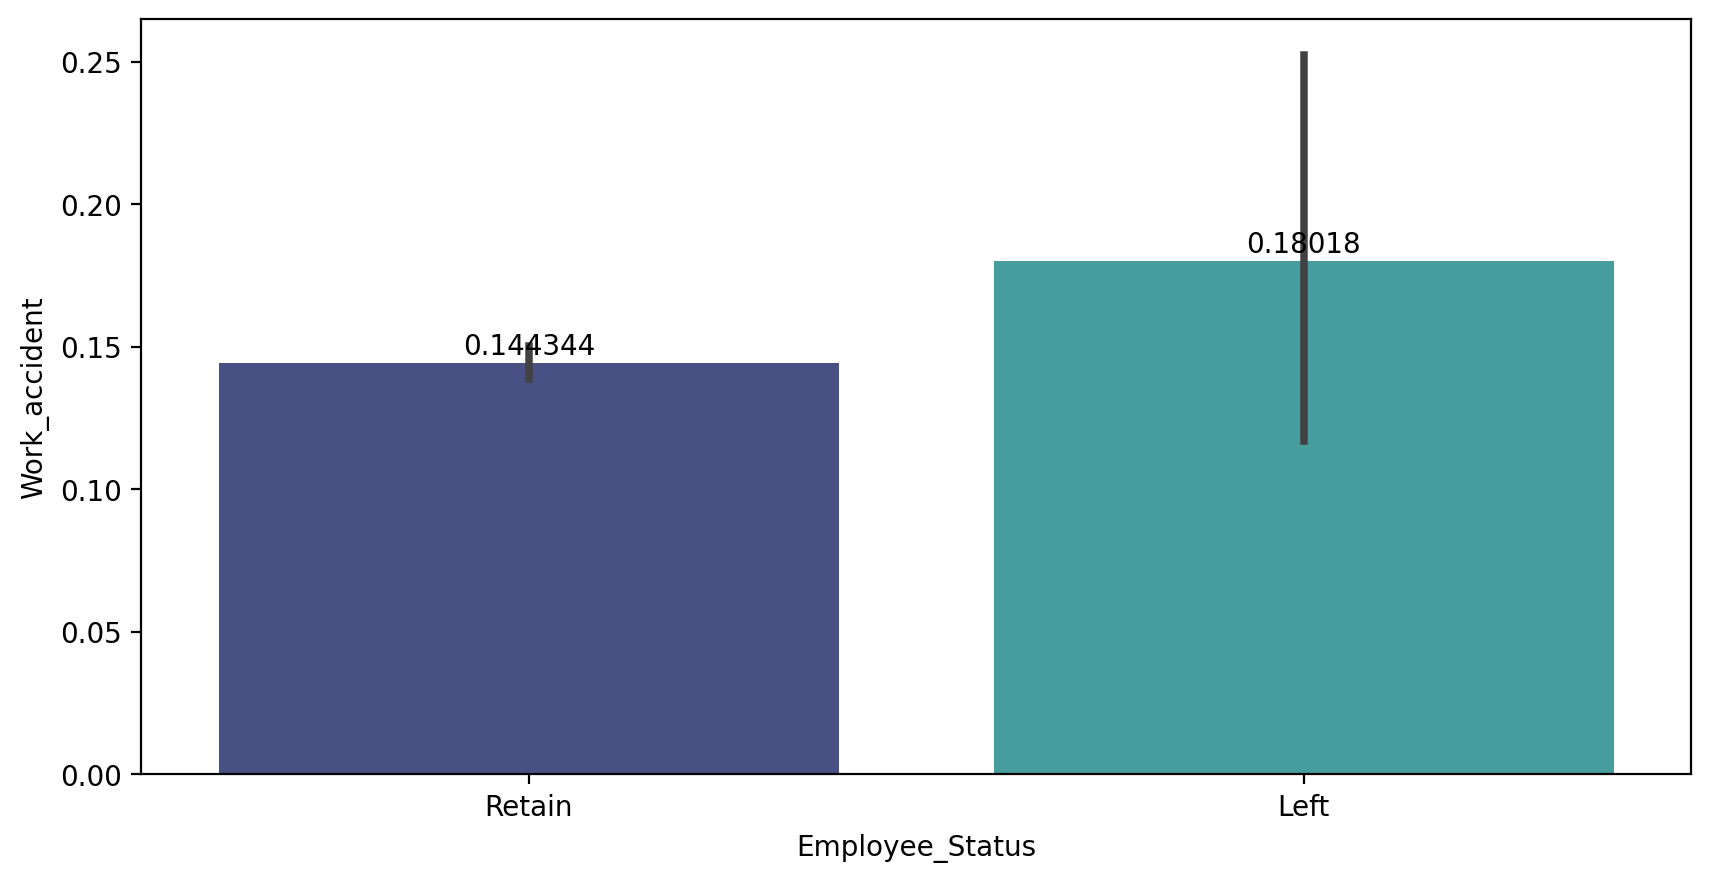

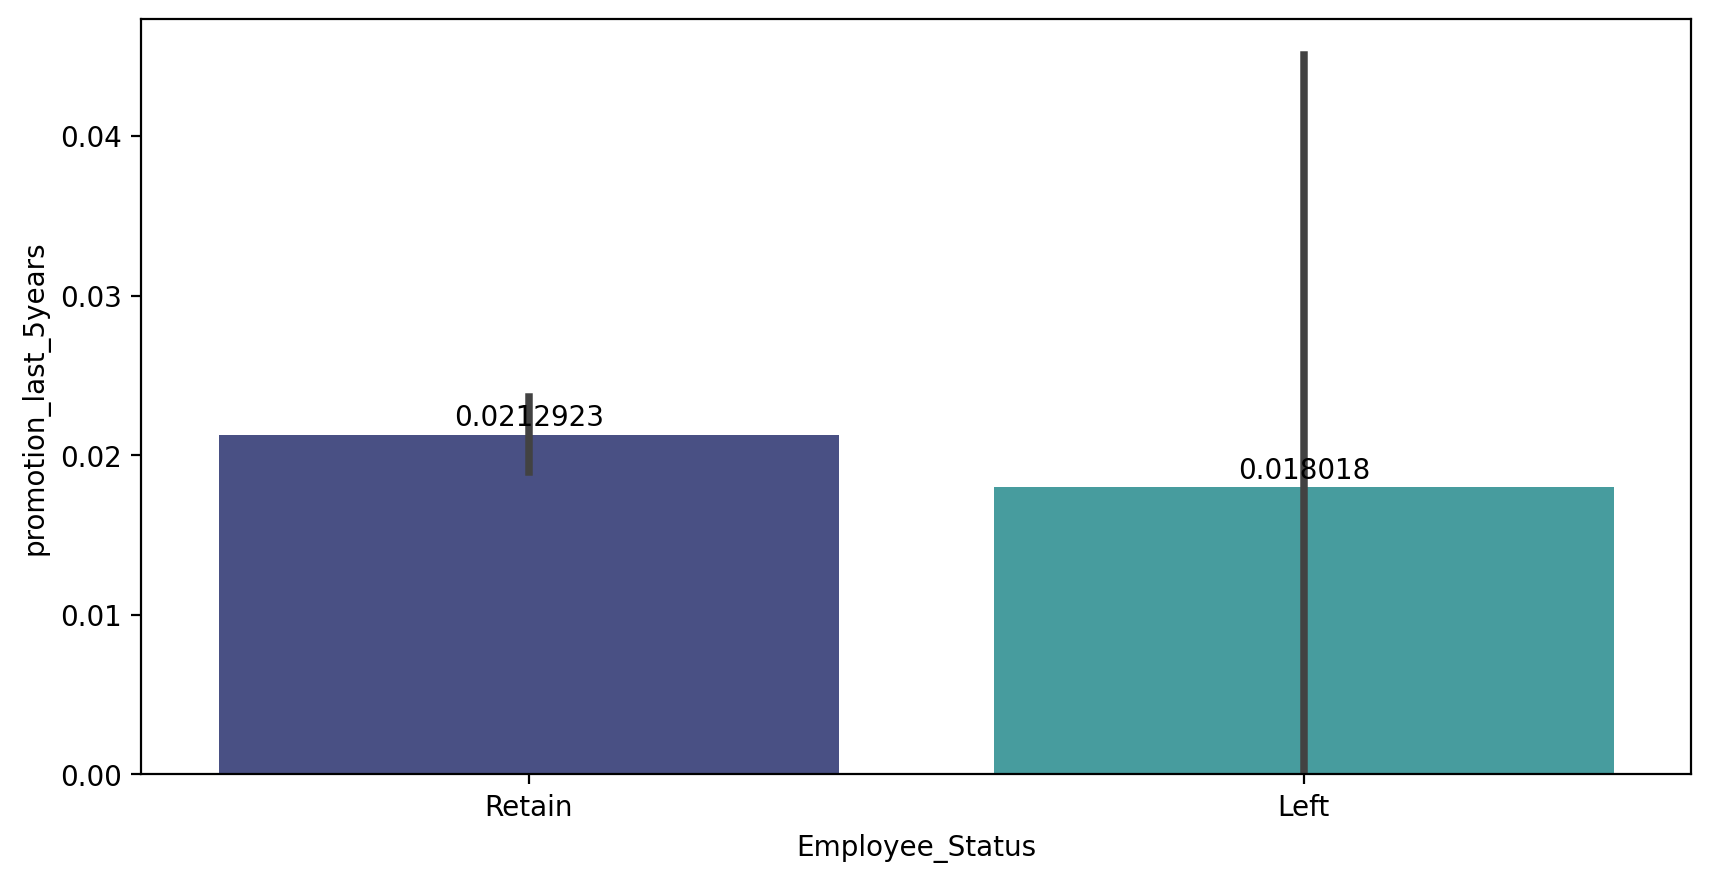

In [17]:
for i,col in enumerate(dframe.drop(columns=['left','Department','salary','Employee_Status'],axis=1)):
    plt.figure(figsize=(10,5),dpi=200)
    figg=sns.barplot(data=dframe,x='Employee_Status',y=col, palette='mako')
    for container in figg.containers:
        figg.bar_label(container,label_type='edge',padding=1)

INSIGHT:
    
    EMPLOYEE WHO LEAVE THE COMPANY HAVE GOOD RATING ON THEIR JOB SATISFACTION THAN THOSE WHO ARE RETAIN.
    
    IN TERM OF WORK EVALUATION ALSO THE LEFT EMPLOYEE HAS TOP THE CHART, IT SEEMS LIKE THE BEST BRAIN HAVE LEAVE THE COMPANY
    
    RETAIN EMPLOYEE TAKE THE LEAD IN TIMES SPENT ON PROJECT. YES I SAID IT, THE BEST BRAIN OR THE WORK SMART EMPLOYEE
    ARE THE ONCES WHO ARE LEAVING THE COMPANY.
    
    IN WORK ACCIDENT;THE NUMBER OF EMPLOYEE WHO HAVE LEFT THE COMPANY TAKE THE LEAD THE CHAT, MAY BE MORE REASON WHY THEY 
    LEFT WHO KNOWNS???
    
    WHY THE NUMBER OF STAFF WHO ARE GIVEN PROMOTION IN THE LAST FIVE YEAR ARE THE RETAIN STAFF.

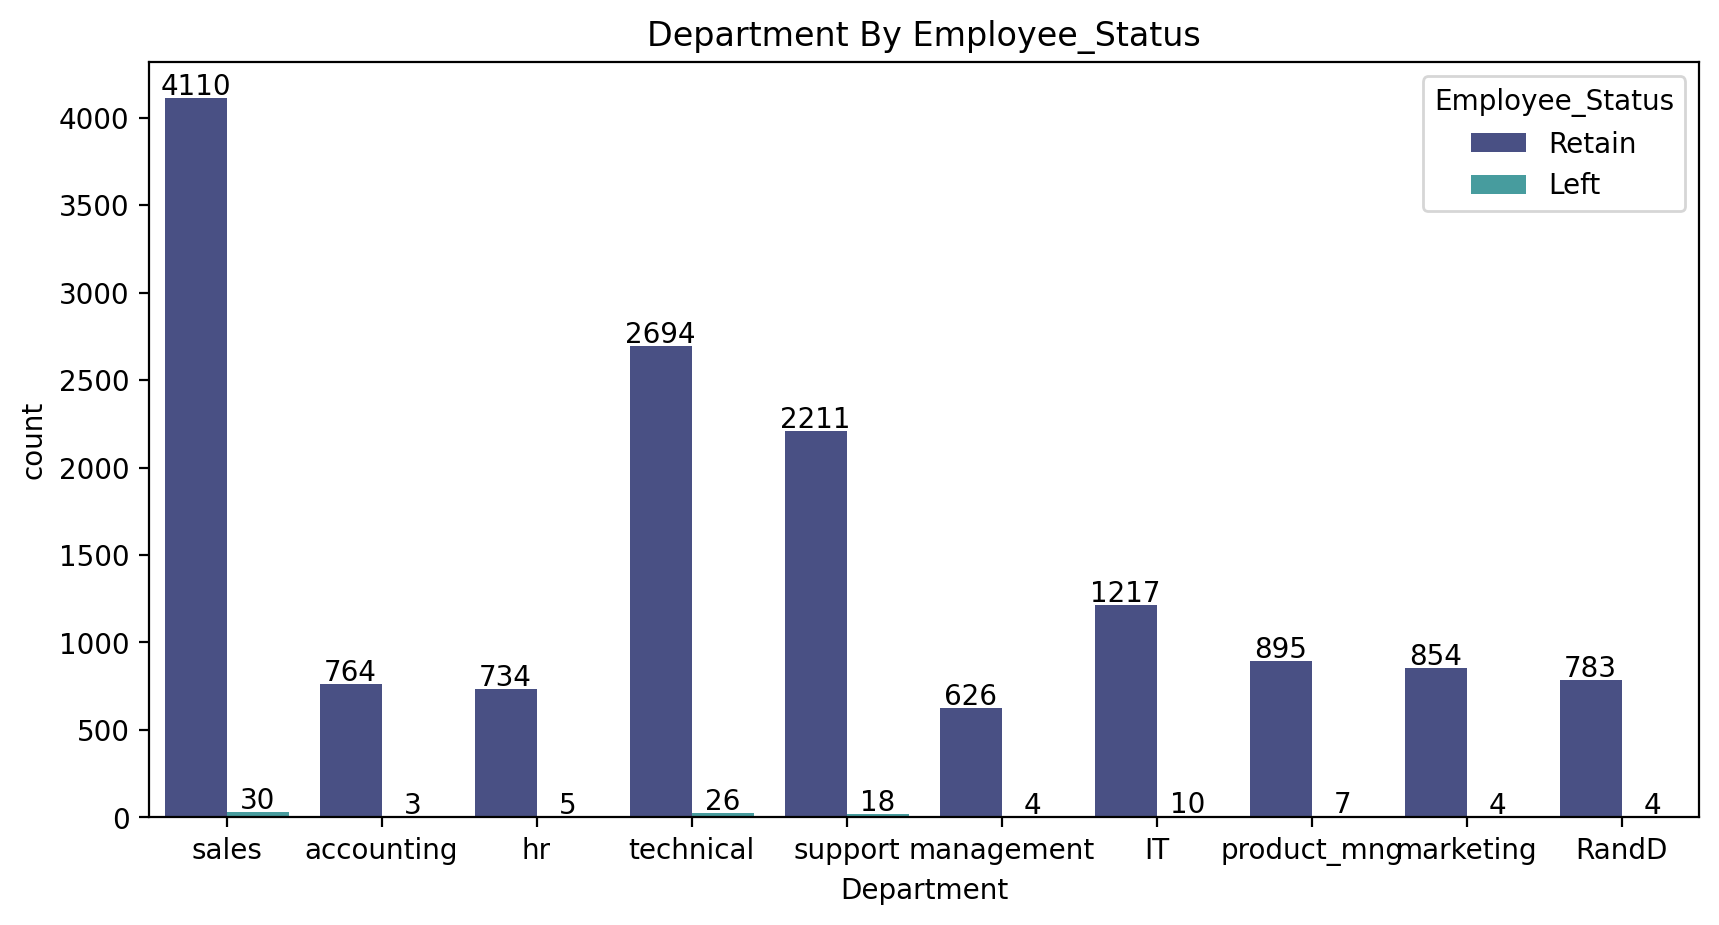

In [18]:
plt.figure(figsize=(10,5),dpi=200)
fig=sns.countplot(data=dframe,x='Department',hue='Employee_Status',palette='mako')
plt.title('Department By Employee_Status')

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

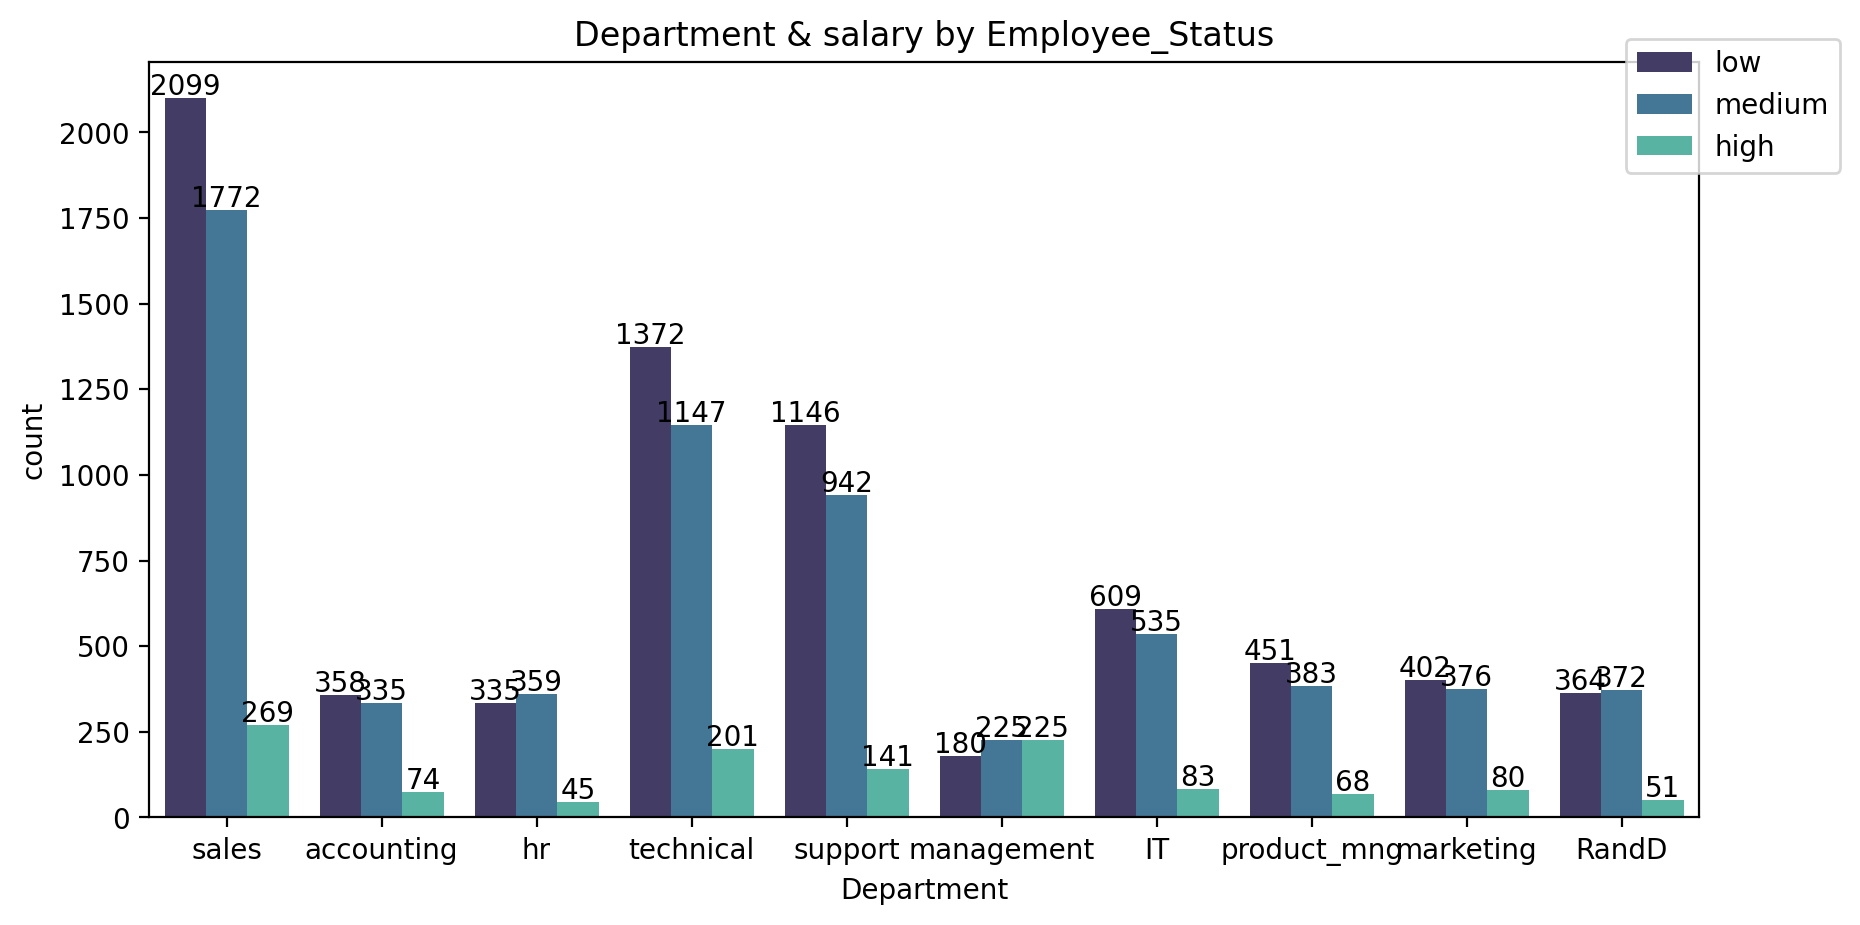

In [19]:
plt.figure(figsize=(10,5),dpi=200)
fig=sns.countplot(data=dframe,x='Department',hue='salary',palette='mako')
plt.title('Department & salary by Employee_Status')
plt.legend(bbox_to_anchor=(1.1,1.05))

for container in fig.containers:
    fig.bar_label(container,label_type='edge',padding=-1)

DEPARTMENT INSIGHT:
    
    
    THE DEPARTMENT OF THE SALES HAVE HIGHT RATE OF SALES PEOPLE WHO LEFT AND ALSO HAVE THE HIGHEST RANK OF EMPLOYEE
    WHO COLLECTING HIGH SALARY.
    
    THE TECHNICAL DEPARTMENT TEAM HAVE HIGH RANK OF PEOPLE WHO LEAVE THE COMPANY
    
    THE DEPARTMENT WHO ARE TAKEN MORE SALARY ARE SALES.

# wE MOVE  TO ML

In [20]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [21]:
#some convertion rate is neededdd
#we need to import Some libraries for our ML

from sklearn.preprocessing import LabelEncoder

In [22]:
encoding=LabelEncoder()

In [23]:
df['Department']=encoding.fit_transform(df['Department'])
df['salary']=encoding.fit_transform(df['salary'])

In [24]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [25]:
df.corr().style.background_gradient(cmap='viridis')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.003153,0.011754
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.007772,0.013965
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.009268,0.009672
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,0.003913,0.007082
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.018010,-0.003086
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.003425,-0.002506
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,0.032105,-0.001294
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,-0.027336,-0.001318
Department,0.003153,0.007772,0.009268,0.003913,-0.018010,0.003425,0.032105,-0.027336,1.000000,0.000685
salary,0.011754,0.013965,0.009672,0.007082,-0.003086,-0.002506,-0.001294,-0.001318,0.000685,1.000000


no multi_colinearity

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()

In [29]:
X=df.drop('left',axis=1)

y=df['left']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model=LogisticRegression()

In [33]:
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [34]:
model.fit(X_train,y_train)

LogisticRegression()

In [35]:
test_predict=model.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score,plot_confusion_matrix,plot_precision_recall_curve,plot_roc_curve,classification_report

In [37]:
Accuracy_Score=accuracy_score(y_test,test_predict)

print("Accuracy_Score:{:.2f}%".format(Accuracy_Score*100))

Accuracy_Score:76.02%


Not stroong enuf...

In [38]:
#i will using the  KNN

from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn=KNeighborsClassifier(n_neighbors=5)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [41]:
knn.fit(X_train,y_train)
test_pred=knn.predict(X_test)
Accuracy_Score=accuracy_score(y_test,test_pred)

In [42]:
print('Accuracy is :{:.2f}%'.format(Accuracy_Score*100))

Accuracy is :93.37%


In [43]:
test_error_rate=[]
for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)
    test_pp=knn_model.predict(X_test)
    test_error=1-accuracy_score(y_test,test_pp)
    test_error_rate.append(test_error)

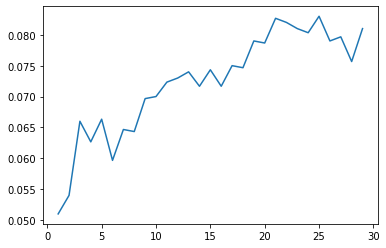

In [44]:
plt.plot(range(1,30),test_error_rate)

In [45]:
from sklearn.metrics import mean_squared_error


In [46]:
K_range=range(1,15)

mse=[]

for k in K_range:
    Knn=KNeighborsClassifier(n_neighbors=k)
    Knn.fit(X_train,y_train)
    test_ppp=Knn.predict(X_test)
    mse.append(mean_squared_error(y_test,test_ppp))

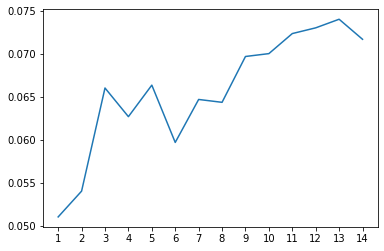

In [47]:
plt.plot(K_range,mse)
plt.xticks(np.arange(min(K_range),max(K_range)+1,1.0));

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [49]:
KNN=KNeighborsClassifier(n_neighbors=1)
KNN.fit(X_train,y_train)
testt_P=KNN.predict(X_test)

In [50]:
Accurancy_S=accuracy_score(y_test,testt_P)
print('Accrancy_score:{:.2f}%'.format(Accurancy_S*100))

Accrancy_score:94.90%


In [51]:
print(classification_report(y_test,testt_P))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2262
           1       0.86      0.95      0.90       738

    accuracy                           0.95      3000
   macro avg       0.92      0.95      0.93      3000
weighted avg       0.95      0.95      0.95      3000



In [52]:
print('===========>>>>>>>>>>>>>>best Accuracy score so far 94.90%')

===========>>>>>>>>>>>>>>best Accuracy score so far 94.90%
